In [11]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# -------- Configuration --------
DATASET_ROOT = "IRMAS-TrainingData"

SAMPLE_RATE = 22050
DURATION = 3.0
SAMPLES = int(SAMPLE_RATE * DURATION)

N_FFT = 2048
HOP_LENGTH = 512
N_MELS = 128


In [13]:
# IRMAS instrument codes
INSTRUMENT_CODES = ["pia", "vio", "tru"]  # piano, violin, trumpet


In [14]:
# -------- Audio Loading --------
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE, mono=True)

    # Fix duration to 3 seconds
    if len(y) < SAMPLES:
        y = np.pad(y, (0, SAMPLES - len(y)))
    else:
        y = y[:SAMPLES]

    return y, sr

In [15]:
# -------- Audio Augmentations --------
def pitch_shift(y, sr, steps=2):
    return librosa.effects.pitch_shift(y, sr=sr, n_steps=steps)

def time_stretch(y, rate=1.2):
    return librosa.effects.time_stretch(y, rate=rate)

def add_noise(y, noise_factor=0.005):
    noise = np.random.randn(len(y))
    return y + noise_factor * noise

In [16]:
# -------- Mel Spectrogram --------
def mel_spectrogram(y, sr):
    mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=N_FFT,
        hop_length=HOP_LENGTH,
        n_mels=N_MELS
    )
    return librosa.power_to_db(mel, ref=np.max)

In [17]:
# -------- Visualization --------
def visualize_augmentations(file_path, instrument_code):
    y, sr = load_audio(file_path)

    signals = {
        "Original": y,
        "Pitch Shift": pitch_shift(y, sr),
        "Time Stretch": time_stretch(y),
        "Noise Added": add_noise(y)
    }

    plt.figure(figsize=(12, 8))

    for i, (name, signal) in enumerate(signals.items(), 1):
        mel_db = mel_spectrogram(signal, sr)
        plt.subplot(4, 1, i)
        librosa.display.specshow(
            mel_db,
            sr=sr,
            x_axis="time",
            y_axis="mel"
        )
        plt.colorbar(format="%+2.0f dB")
        plt.title(f"{instrument_code.upper()} – {name}")

    plt.tight_layout()
    plt.show()

Starting IRMAS audio augmentation visualization
Processing PIA → IRMAS-TrainingData\IRMAS-TrainingData\pia\001__[pia][nod][cla]1389__1.wav


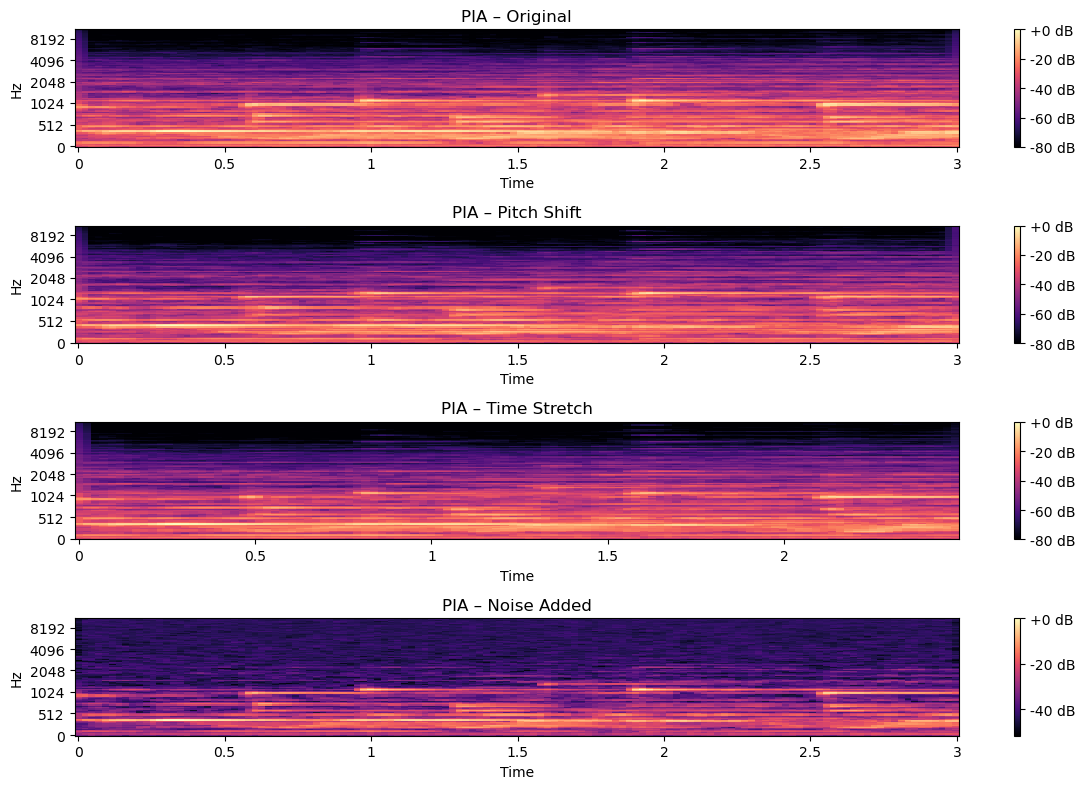

Processing TRU → IRMAS-TrainingData\IRMAS-TrainingData\tru\001__[tru][nod][jaz_blu]1986__1.wav


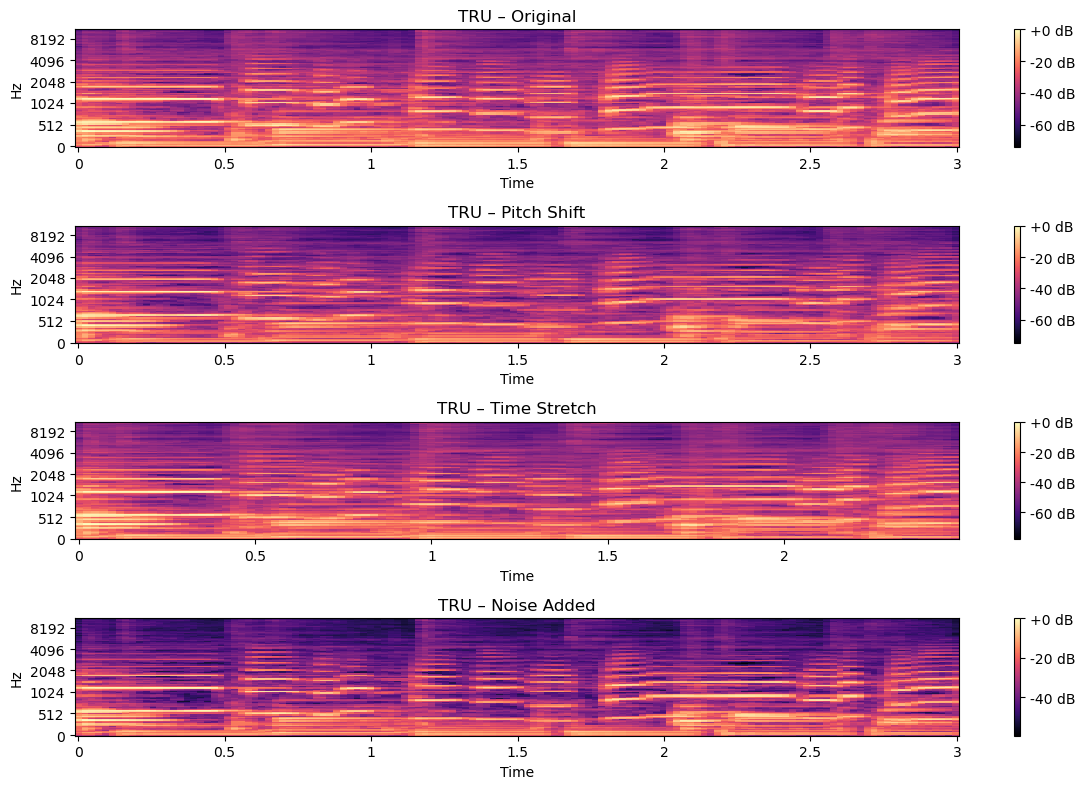

In [ ]:
# -------- Find one file per instrument (RECURSIVE) --------
def find_one_audio_per_instrument(root_dir, instrument_codes):
    found = {}

    for root, _, files in os.walk(root_dir):
        for file in files:
            if not file.lower().endswith(".wav"):
                continue

            # IRMAS instrument code is inside filename: [pia], [vio], etc.
            for code in instrument_codes:
                if f"[{code}]" in file and code not in found:
                    found[code] = os.path.join(root, file)

        # Stop early if all found
        if len(found) == len(instrument_codes):
            break

    return found

# -------- Main Execution --------
if __name__ == "__main__":

    print("Starting IRMAS audio augmentation visualization")

    samples = find_one_audio_per_instrument(
        DATASET_ROOT,
        INSTRUMENT_CODES
    )

    if len(samples) == 0:
        print("❌ No IRMAS audio files found. Check dataset path.")
    else:
        for code, path in samples.items():
            print(f"Processing {code.upper()} → {path}")
            visualize_augmentations(path, code)


Starting IRMAS audio augmentation visualization
Processing PIA → IRMAS-TrainingData\IRMAS-TrainingData\pia\001__[pia][nod][cla]1389__1.wav


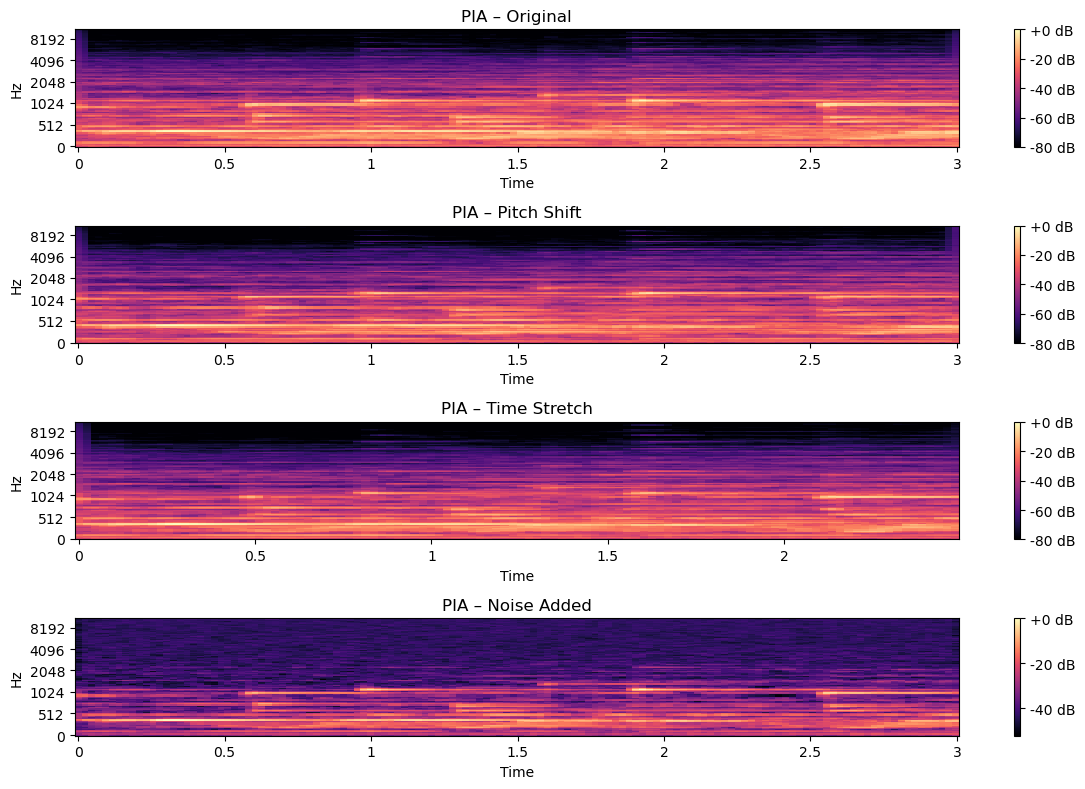

Processing TRU → IRMAS-TrainingData\IRMAS-TrainingData\tru\001__[tru][nod][jaz_blu]1986__1.wav


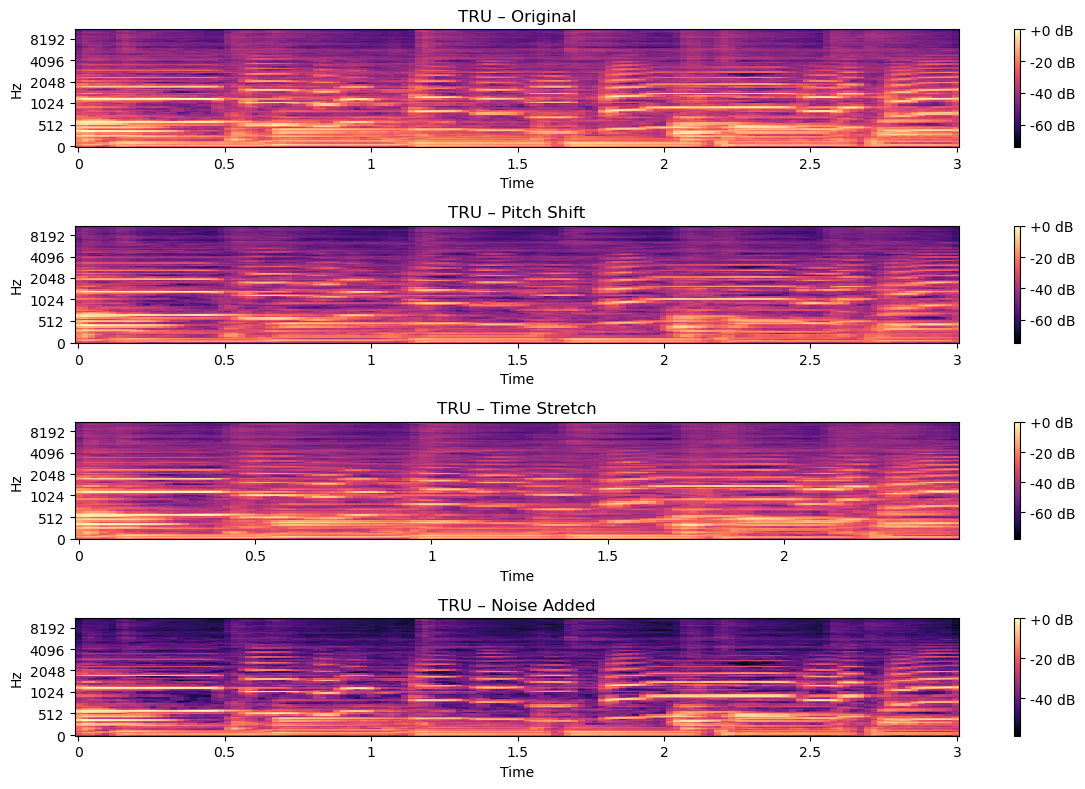

Processing VIO → IRMAS-TrainingData\IRMAS-TrainingData\vio\001__[vio][nod][cou_fol]2194__1.wav


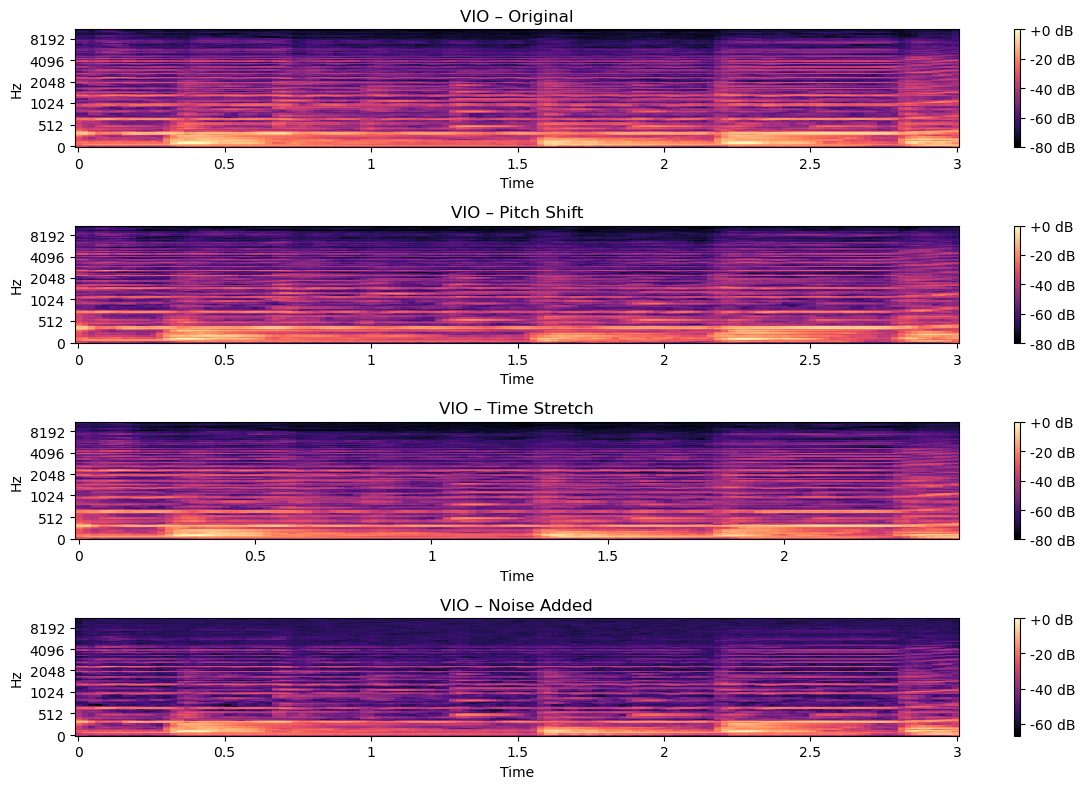

In [10]:
# =========================================
# IRMAS Audio Augmentation & Visualization
# (Recursive folder-safe version)
# =========================================

import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# -------- Configuration --------
DATASET_ROOT = "IRMAS-TrainingData"

SAMPLE_RATE = 22050
DURATION = 3.0
SAMPLES = int(SAMPLE_RATE * DURATION)

N_FFT = 2048
HOP_LENGTH = 512
N_MELS = 128

# IRMAS instrument codes
INSTRUMENT_CODES = ["pia", "vio", "tru"]  # piano, violin, trumpet

# -------- Audio Loading --------
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE, mono=True)

    # Fix duration to 3 seconds
    if len(y) < SAMPLES:
        y = np.pad(y, (0, SAMPLES - len(y)))
    else:
        y = y[:SAMPLES]

    return y, sr

# -------- Audio Augmentations --------
def pitch_shift(y, sr, steps=2):
    return librosa.effects.pitch_shift(y, sr=sr, n_steps=steps)

def time_stretch(y, rate=1.2):
    return librosa.effects.time_stretch(y, rate=rate)

def add_noise(y, noise_factor=0.005):
    noise = np.random.randn(len(y))
    return y + noise_factor * noise

# -------- Mel Spectrogram --------
def mel_spectrogram(y, sr):
    mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=N_FFT,
        hop_length=HOP_LENGTH,
        n_mels=N_MELS
    )
    return librosa.power_to_db(mel, ref=np.max)

# -------- Visualization --------
def visualize_augmentations(file_path, instrument_code):
    y, sr = load_audio(file_path)

    signals = {
        "Original": y,
        "Pitch Shift": pitch_shift(y, sr),
        "Time Stretch": time_stretch(y),
        "Noise Added": add_noise(y)
    }

    plt.figure(figsize=(12, 8))

    for i, (name, signal) in enumerate(signals.items(), 1):
        mel_db = mel_spectrogram(signal, sr)
        plt.subplot(4, 1, i)
        librosa.display.specshow(
            mel_db,
            sr=sr,
            x_axis="time",
            y_axis="mel"
        )
        plt.colorbar(format="%+2.0f dB")
        plt.title(f"{instrument_code.upper()} – {name}")

    plt.tight_layout()
    plt.show()

# -------- Find one file per instrument (RECURSIVE) --------
def find_one_audio_per_instrument(root_dir, instrument_codes):
    found = {}

    for root, _, files in os.walk(root_dir):
        for file in files:
            if not file.lower().endswith(".wav"):
                continue

            # IRMAS instrument code is inside filename: [pia], [vio], etc.
            for code in instrument_codes:
                if f"[{code}]" in file and code not in found:
                    found[code] = os.path.join(root, file)

        # Stop early if all found
        if len(found) == len(instrument_codes):
            break

    return found

# -------- Main Execution --------
if __name__ == "__main__":

    print("Starting IRMAS audio augmentation visualization")

    samples = find_one_audio_per_instrument(
        DATASET_ROOT,
        INSTRUMENT_CODES
    )

    if len(samples) == 0:
        print("❌ No IRMAS audio files found. Check dataset path.")
    else:
        for code, path in samples.items():
            print(f"Processing {code.upper()} → {path}")
            visualize_augmentations(path, code)
